In [1]:
import torch
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# These are the inputs and outputs of some particular transformer in the ModuleList
# The hidden state before the transformer before the transformer does its transformation
inputs = torch.load('..//scripts/data/inputs_0_7.pt')
# The hidden state after the transformation
outputs = torch.load('..//scripts/data/outputs_0_7.pt')

In [3]:
# Need to remember this for late
inputs.shape

torch.Size([4, 116, 2048])

In [4]:
print(f'Number of paths:       {inputs.shape[0]}')
print(f'Length of path:        {inputs.shape[1]}')
print(f'Dim of points on path: {inputs.shape[2]}')
number_of_paths = inputs.shape[0]
length_of_path = inputs.shape[1]
dim_of_points_on_path = inputs.shape[2]

Number of paths:       4
Length of path:        116
Dim of points on path: 2048


In [5]:
# Remove the first entry of the path
inputs = inputs[:, 1:, :]
outputs = outputs[:, 1:, :]

In [6]:
# Flatten the data into just a list of points
input_points = inputs.reshape(-1, 2048)
output_points = outputs.reshape(-1, 2048)

In [7]:
# Make sure that the flattening works as expected
torch.norm(inputs[2, 7, :] - input_points.reshape(number_of_paths, length_of_path-1, -1)[2, 7, :])

tensor(0., device='cuda:0')

In [8]:
# Whiten the data
input_points = (input_points - input_points.mean(dim=0, keepdim=True))/input_points.std(dim=0, keepdim=True)
output_points = (output_points - output_points.mean(dim=0, keepdim=True))/output_points.std(dim=0, keepdim=True)

In [9]:
# Try to make the input and the output as close as possible  
# XW=Y
X = input_points
Y = output_points
W = torch.inverse(X.T @ X) @ X.T @ Y 
Y_hat = X @ W

In [10]:
torch.norm(X-Y)

tensor(1390.7861, device='cuda:0')

In [11]:
torch.norm(Y_hat - Y)

tensor(438917.5000, device='cuda:0')

In [12]:
# project the input_points to two dimensions using pca in pytorch using svd
U,S,V = torch.svd_lowrank(Y)

In [13]:

# project the input points to two dimensions
input_points_2d = torch.matmul(Y_hat, V[:,:2]) 
output_points_2d = torch.matmul(Y, V[:,:2]) 

In [14]:
# Ok, now go back to the original shapes for plotting
input_points_2d = input_points_2d.reshape(number_of_paths, length_of_path-1, -1).cpu()
output_points_2d = output_points_2d.reshape(number_of_paths, length_of_path-1, -1).cpu()

In [15]:
?plt.quiver

Signature: plt.quiver(*args, data=None, **kwargs) -> 'Quiver'
Docstring:
Plot a 2D field of arrows.

Call signature::

  quiver([X, Y], U, V, [C], **kwargs)

*X*, *Y* define the arrow locations, *U*, *V* define the arrow directions, and
*C* optionally sets the color.

**Arrow length**

The default settings auto-scales the length of the arrows to a reasonable size.
To change this behavior see the *scale* and *scale_units* parameters.

**Arrow shape**

The arrow shape is determined by *width*, *headwidth*, *headlength* and
*headaxislength*. See the notes below.

**Arrow styling**

Each arrow is internally represented by a filled polygon with a default edge
linewidth of 0. As a result, an arrow is rather a filled area, not a line with
a head, and `.PolyCollection` properties like *linewidth*, *edgecolor*,
*facecolor*, etc. act accordingly.


Parameters
----------
X, Y : 1D or 2D array-like, optional
    The x and y coordinates of the arrow locations.

    If not given, they will be genera

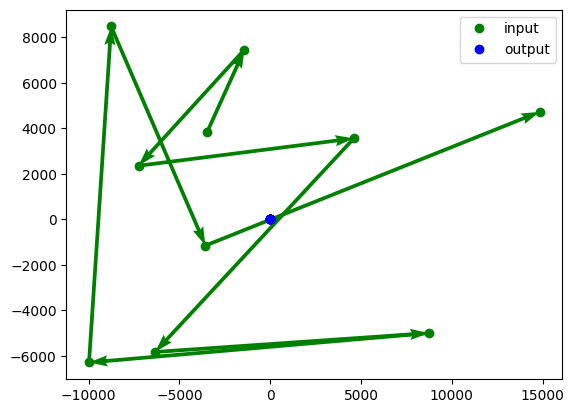

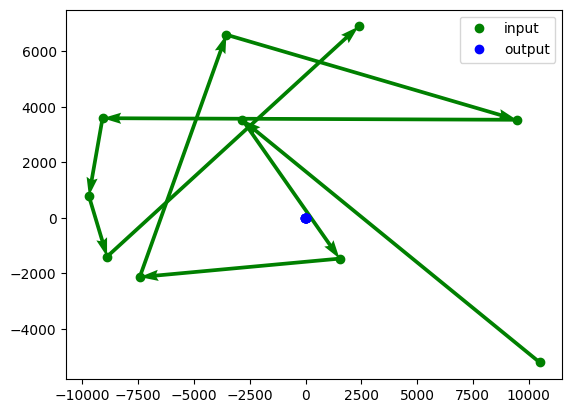

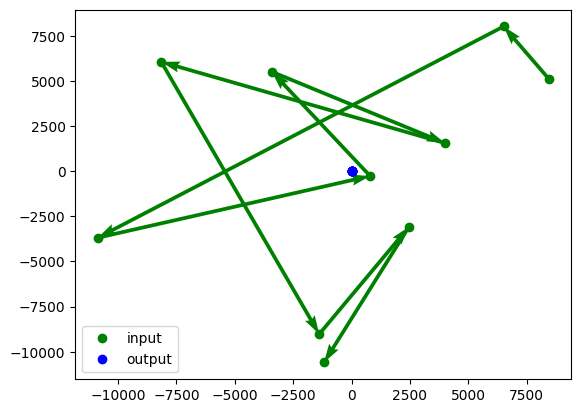

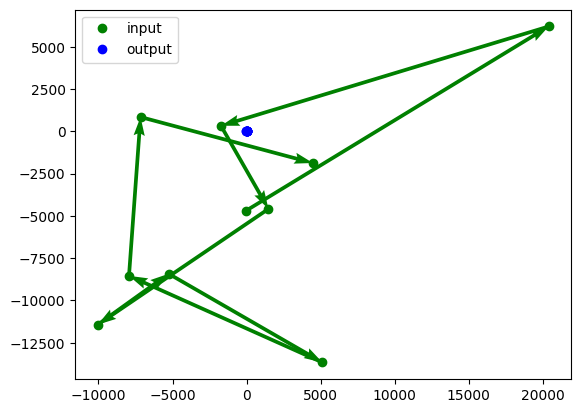

In [16]:
plot_range = torch.arange(0,10)
for i in range(4):
    plt.plot(input_points_2d[i, plot_range, 0], 
             input_points_2d[i, plot_range, 1], 
             'o', color='g', label='input')
    x = input_points_2d[i, plot_range, 0]
    y = input_points_2d[i, plot_range, 1]
    plt.quiver(x[:-1], y[:-1],x[1:]-x[:-1], y[1:]-y[:-1], 
               color='g', angles='xy', scale_units='xy', scale=1)

    plt.plot(output_points_2d[i, plot_range ,0], 
             output_points_2d[i, plot_range, 1], 
             'o', color='b', label='output')
    x = output_points_2d[i, plot_range, 0]
    y = output_points_2d[i, plot_range, 1]
    plt.quiver(x[:-1], y[:-1],x[1:]-x[:-1], y[1:]-y[:-1], 
               color='b', angles='xy', scale_units='xy', scale=1)


    plt.legend()
    plt.show()


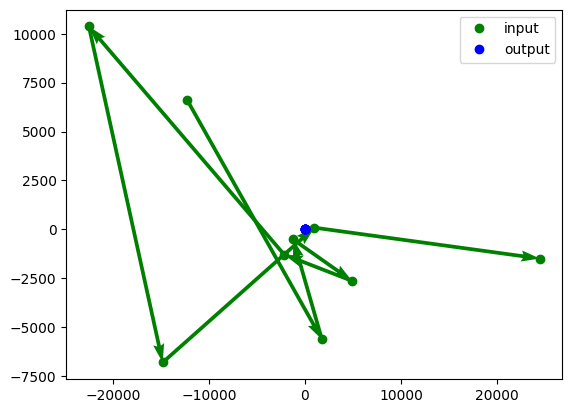

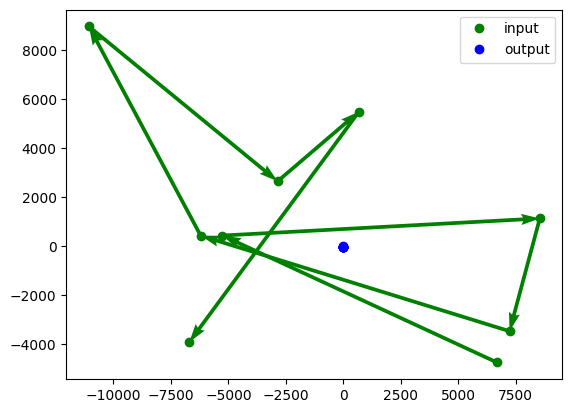

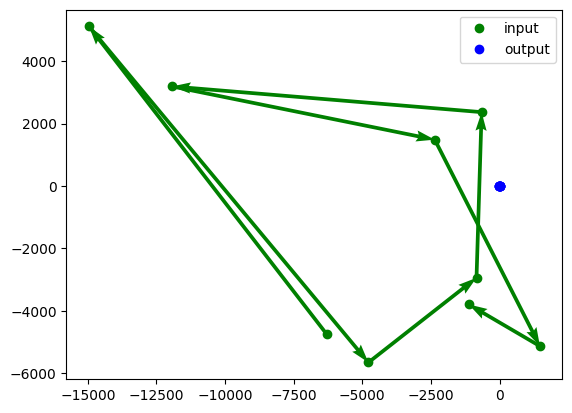

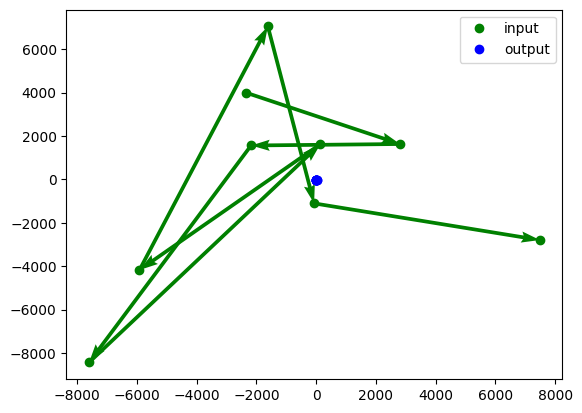

In [17]:
plot_range = torch.arange(106,115)
for i in range(4):
    plt.plot(input_points_2d[i, plot_range, 0], 
             input_points_2d[i, plot_range, 1], 
             'o', color='g', label='input')
    x = input_points_2d[i, plot_range, 0]
    y = input_points_2d[i, plot_range, 1]
    plt.quiver(x[:-1], y[:-1],x[1:]-x[:-1], y[1:]-y[:-1], 
               color='g', angles='xy', scale_units='xy', scale=1)

    plt.plot(output_points_2d[i, plot_range ,0], 
             output_points_2d[i, plot_range, 1], 
             'o', color='b', label='output')
    x = output_points_2d[i, plot_range, 0]
    y = output_points_2d[i, plot_range, 1]
    plt.quiver(x[:-1], y[:-1],x[1:]-x[:-1], y[1:]-y[:-1], 
               color='b', angles='xy', scale_units='xy', scale=1)


    plt.legend()
    plt.show()


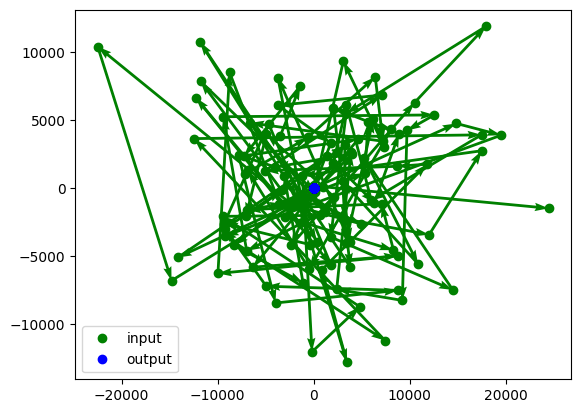

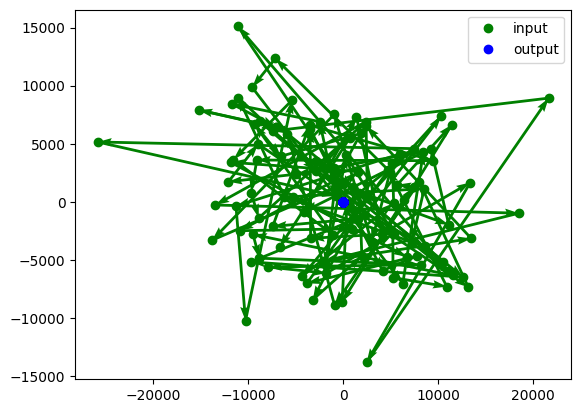

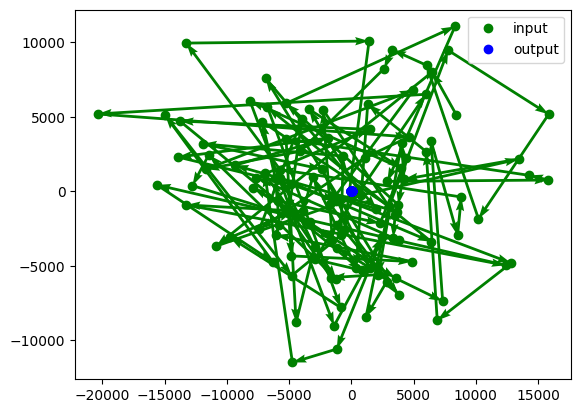

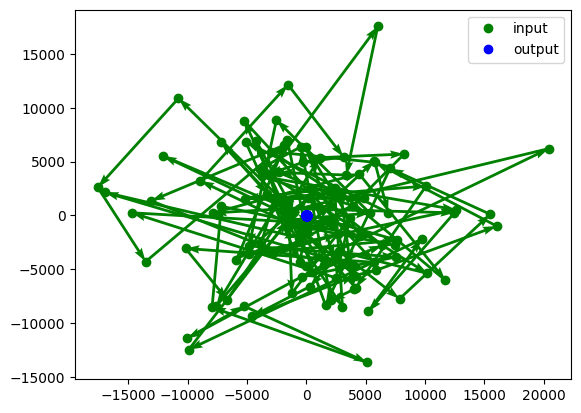

In [18]:
plot_range = torch.arange(0,115)
for i in range(4):
    plt.plot(input_points_2d[i, plot_range, 0], 
             input_points_2d[i, plot_range, 1], 
             'o', color='g', label='input')
    x = input_points_2d[i, plot_range, 0]
    y = input_points_2d[i, plot_range, 1]
    plt.quiver(x[:-1], y[:-1],x[1:]-x[:-1], y[1:]-y[:-1], 
               color='g', angles='xy', scale_units='xy', scale=1)

    plt.plot(output_points_2d[i, plot_range ,0], 
             output_points_2d[i, plot_range, 1], 
             'o', color='b', label='output')
    x = output_points_2d[i, plot_range, 0]
    y = output_points_2d[i, plot_range, 1]
    plt.quiver(x[:-1], y[:-1],x[1:]-x[:-1], y[1:]-y[:-1], 
               color='b', angles='xy', scale_units='xy', scale=1)


    plt.legend()
    plt.show()
